First Exploration Nov. 5 2020

In [2]:
import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial

import datetime
from datetime import date
import datetime
import time


import scipy
import os, os.path
import itertools
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb


import sys


# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/Stop_the_Rot/')
import onion_core as oc

In [3]:
data_dir = "/Users/hn/Documents/01_research_data/Stop_the_Rot/files_from_team/Columbia_Basin_Farm_A_red_onion_data/"

# Cleaned 3 Farm A irrigation Applied 2017

In [4]:
dd = "/Users/hn/Documents/01_research_data/Stop_the_Rot/Clean_For_Python/"
irrigation_fileN = "CLEANED (3) Farm A Irrigation Applied 2017 selected fields_Python.xlsx"

In [5]:
xl = pd.ExcelFile(dd + irrigation_fileN)
EX_sheet_names = xl.sheet_names
EX_sheet_names

['(clean) Year Summary', '(clean) Hours of operation']

# replace NAs with zeros

In [6]:
Irrigation_2017 = pd.read_excel(io = dd + irrigation_fileN, 
                                header = 0, 
                                sheet_name = "(clean) Year Summary", 
                                skiprows = 0)

Irrigation_2017_NA_0 = Irrigation_2017.copy()
Irrigation_2017_NA_0.sort_values(by = 'Date', inplace=True)
Irrigation_2017_NA_0['irrig_inch'] = Irrigation_2017_NA_0['irrig_inch'].fillna(0)


In [7]:
threshold =  Irrigation_2017_NA_0.Date[13]
threshold

Timestamp('2017-05-24 00:00:00')

In [8]:
Irrigation_2017_NA_0_after_May20 = Irrigation_2017_NA_0[Irrigation_2017_NA_0.Date >= threshold].copy()
Irrigation_2017_NA_0_after_May20['irr_cum_sum'] = Irrigation_2017_NA_0_after_May20.groupby(['Field'])['irrig_inch'].cumsum()

In [9]:
np.sort(Irrigation_2017_NA_0_after_May20.Date.unique())

array(['2017-05-24T00:00:00.000000000', '2017-05-31T00:00:00.000000000',
       '2017-06-07T00:00:00.000000000', '2017-06-14T00:00:00.000000000',
       '2017-06-21T00:00:00.000000000', '2017-06-28T00:00:00.000000000',
       '2017-07-05T00:00:00.000000000', '2017-07-12T00:00:00.000000000',
       '2017-07-19T00:00:00.000000000', '2017-07-26T00:00:00.000000000',
       '2017-08-02T00:00:00.000000000', '2017-08-09T00:00:00.000000000',
       '2017-08-16T00:00:00.000000000', '2017-08-23T00:00:00.000000000',
       '2017-08-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
Irrigation_2017_NA_0_after_May20.head(2)

,Field,Acres,Date,GPM High,irrig_inch,irrig_hour,Harvest Dates,irr_cum_sum
125,A4,120.0,2017-05-24,900.0,1.990168,120.1,2017-09-13,1.990168
97,A5,120.0,2017-05-24,900.0,1.996796,120.5,2017-08-23,1.996796


In [11]:
# Irrigation_2017[Irrigation_2017['irrig_inch'].isnull()]

In [12]:
Irrigation_2017_NA_0_after_May20.head(3)

,Field,Acres,Date,GPM High,irrig_inch,irrig_hour,Harvest Dates,irr_cum_sum
125,A4,120.0,2017-05-24,900.0,1.990168,120.1,2017-09-13,1.990168
97,A5,120.0,2017-05-24,900.0,1.996796,120.5,2017-08-23,1.996796
69,A3,128.0,2017-05-24,960.0,1.324017,79.9,2017-09-09,1.324017


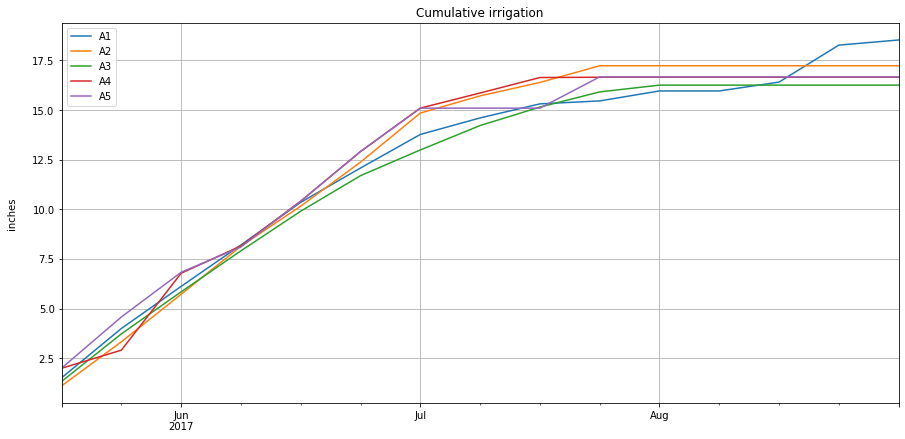

In [24]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          #'figure.figsize': (15, 5),
          'axes.labelsize': 32, # changes date (a), (b), (c), (d) on x-axis, EVI, NDVI on y axis. 
                               # The smaller this number the bigger the labels!!
          'axes.titlesize': 32, # changes titles, bean dry for example. 
                               # This line and the one above are connected, problematic
          'xtick.labelsize':20,
          'ytick.labelsize':20
         }



df = Irrigation_2017_NA_0_after_May20.copy();

fig, ax = plt.subplots(figsize=(15,7))

df.set_index('Date', inplace=True);
df.groupby('Field')['irr_cum_sum'].plot(legend=True);

ax.grid(True);
ax.set_title("Cumulative irrigation");
ax.set(xlabel = "", ylabel = 'inches')
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15

# ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
# ax.xaxis.set_major_formatter(np.sort(df.index.unique()))

file_name = dd + "Cumulative_irrigation_13.png"
plt.savefig(fname = file_name, dpi=600, bbox_inches='tight')
plt.show()

In [25]:
dd

'/Users/hn/Documents/01_research_data/Stop_the_Rot/Clean_For_Python/'

   - **A1**: Apr 1 - Sep 6
   - **A2**: Mar 25 - Sep 6
   - **A3**: Mar 15 - Sep 13
   - **A4**: Mar 21 - Sep 15
   - **A5**: Mar 16 - Sep 23

In [45]:
planting_dates = [datetime.date(2017, 4, 1),
                  datetime.date(2017, 3, 25),
                  datetime.date(2017, 3, 15),
                  datetime.date(2017, 3, 21),
                  datetime.date(2017, 3, 16)]

harvesting_dates = [datetime.date(2017, 9, 6),
                    datetime.date(2017, 9, 6),
                    datetime.date(2017, 9, 13),
                    datetime.date(2017, 9, 15),
                    datetime.date(2017, 9, 23)]

field_names = ['A1', 'A2', 'A3', 'A4', 'A5']

data1 = {'field_names': field_names, 'planting dates': planting_dates, 'harvesting dates': harvesting_dates}

Planting_and_Harvesting_dates = pd.DataFrame(data1)

In [109]:
planting_dates = [datetime.date(2017, 4, 1),
                  datetime.date(2017, 3, 25),
                  datetime.date(2017, 3, 15),
                  datetime.date(2017, 3, 21),
                  datetime.date(2017, 3, 16)]

planting_y = [5.7, 2, 1.2, 0, 0]
planting_y = [0, 0, 0, 0, 0]

harvesting_dates = [datetime.date(2017, 9, 6),
                    datetime.date(2017, 9, 6),
                    datetime.date(2017, 9, 13),
                    datetime.date(2017, 9, 15),
                    datetime.date(2017, 9, 23)]

harvesting_y = [29.5, 24.2, 25, 17, 17]

field_names = ['A1', 'A2', 'A3', 'A4', 'A5']

colors = ['cornflowerblue', 'orange', 'green', 'red', 'purple']

planting_table = {'Field': field_names, 'planting dates': planting_dates, 'y': planting_y, 'colors':colors}
harvesting_table = {'Field': field_names, 'harvesting dates': harvesting_dates, 'y': harvesting_y, 'colors':colors}

planting_table = pd.DataFrame(planting_table)
harvesting_table = pd.DataFrame(harvesting_table)

planting_table.sort_values(by = 'planting dates', inplace=True)
harvesting_table.sort_values(by = 'harvesting dates', inplace=True)

# After updating Pandas the damn datetime format is problematic:

In [110]:
planting_table['planting dates'] = pd.to_datetime(planting_table['planting dates'])
harvesting_table['harvesting dates'] = pd.to_datetime(harvesting_table['harvesting dates'])

In [111]:
planting_table.set_index('planting dates', inplace=True);
planting_table.head(2)

,Field,y,colors
planting dates,,,
2017-03-15,A3,0,green
2017-03-16,A5,0,purple


In [112]:
planting_table.index

DatetimeIndex(['2017-03-15', '2017-03-16', '2017-03-21', '2017-03-25',
               '2017-04-01'],
              dtype='datetime64[ns]', name='planting dates', freq=None)

In [113]:
planting_table.colors

planting dates
2017-03-15             green
2017-03-16            purple
2017-03-21               red
2017-03-25            orange
2017-04-01    cornflowerblue
Name: colors, dtype: object

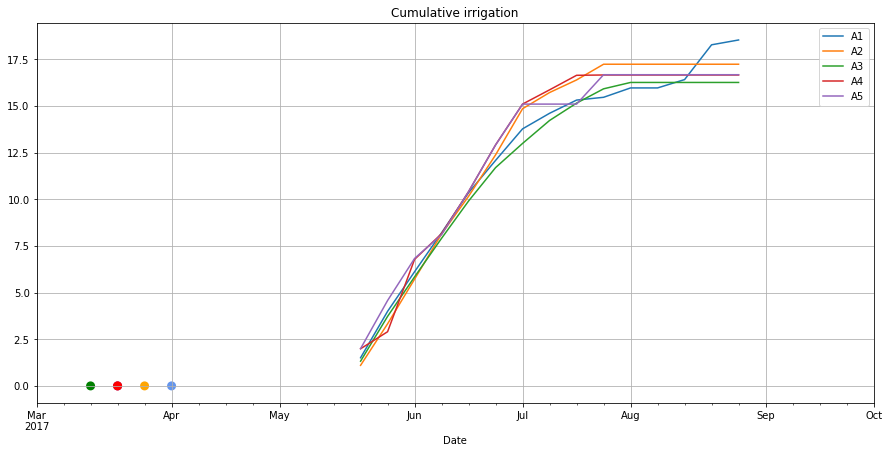

In [114]:
df = Irrigation_2017_NA_0_after_May20.copy();

fig, ax = plt.subplots(figsize = (15,7))

df.set_index('Date', inplace = True);
df.groupby('Field')['irr_cum_sum'].plot(legend=True);

# add planting dots
plt.scatter(x = planting_table.index, 
            y = planting_table['y'], 
            linewidths=3, 
            c = planting_table.colors)

ax.set_xlim([datetime.date(2017, 3, 1), datetime.date(2017, 10, 1)])

ax.grid(True);
ax.set_title("Cumulative irrigation");


file_name = dd + "Cumulative_irrigation.png"
plt.savefig(fname = file_name, dpi = 600, bbox_inches='tight')
plt.show()

KeyError: 'Column not found: irr_cum_sum'

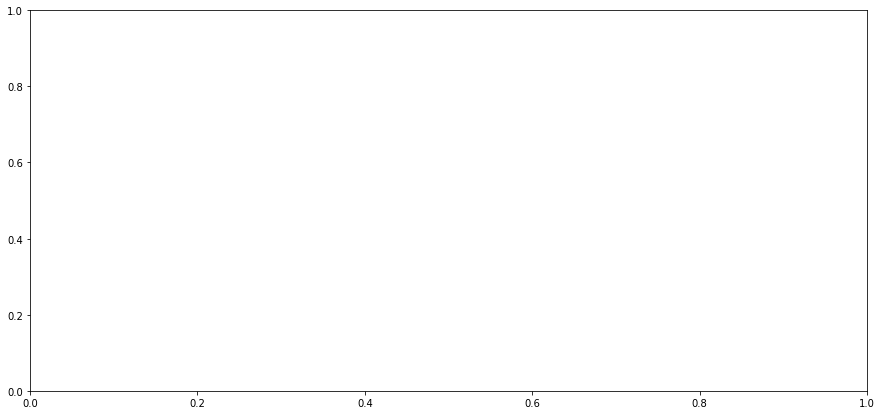

In [47]:
df = Irrigation_2017_NA_0.copy();

fig, ax = plt.subplots(figsize=(15,7))

df.set_index('Date', inplace=True);
df.groupby('Field')['irr_cum_sum'].plot(legend=True);

# add planting dots
plt.scatter(x = Planting_and_Harvesting_dates.loc[0, 'planting dates'], y = 5.7, linewidths=3)
plt.scatter(x = Planting_and_Harvesting_dates.loc[1, 'planting dates'], y = 2, linewidths=3)
plt.scatter(x = Planting_and_Harvesting_dates.loc[2, 'planting dates'], y = 1.2, linewidths=3)
plt.scatter(x = Planting_and_Harvesting_dates.loc[3, 'planting dates'], y = 0, linewidths=3)
plt.scatter(x = Planting_and_Harvesting_dates.loc[4, 'planting dates'], y = 0, linewidths=3)

plt.scatter(x = Planting_and_Harvesting_dates.loc[0, 'harvesting dates'], 
            y = 29.5, 
            linewidths=3, 
            c = 'cornflowerblue')

plt.scatter(x = Planting_and_Harvesting_dates.loc[1, 'harvesting dates'], 
            y = 24.2, 
            linewidths=3, 
            c = 'orange')

plt.scatter(x = Planting_and_Harvesting_dates.loc[2, 'harvesting dates'], 
            y = 25, 
            linewidths=3, 
            c = 'green')

plt.scatter(x = Planting_and_Harvesting_dates.loc[3, 'harvesting dates'], 
            y = 17, 
            linewidths=3, 
            c = 'red')

plt.scatter(x = Planting_and_Harvesting_dates.loc[4, 'harvesting dates'], 
            y = 17, 
            linewidths=3, 
            c = 'purple')

ax.grid(True);
ax.set_title("Cumulative irrigation (dots are planting and harvesting dates)");


file_name = python_data_dir + "Cumulative_irrigation_wPantingHarvesting.png"
plt.savefig(fname = file_name, dpi=600, bbox_inches='tight')
plt.show()

In [42]:
planting_dates = [datetime.date(2017, 4, 1),
                  datetime.date(2017, 3, 25),
                  datetime.date(2017, 3, 15),
                  datetime.date(2017, 3, 21),
                  datetime.date(2017, 3, 16)]

planting_y = [5.7, 2, 1.2, 0, 0]

harvesting_dates = [datetime.date(2017, 9, 6),
                    datetime.date(2017, 9, 6),
                    datetime.date(2017, 9, 13),
                    datetime.date(2017, 9, 15),
                    datetime.date(2017, 9, 23)]

harvesting_y = [29.5, 24.2, 25, 17, 17]

field_names = ['A1', 'A2', 'A3', 'A4', 'A5']

colors = ['cornflowerblue', 'orange', 'green', 'red', 'purple']

planting_table = {'Field': field_names, 'planting dates': planting_dates, 'y': planting_y, 'colors':colors}
harvesting_table = {'Field': field_names, 'harvesting dates': harvesting_dates, 'y': harvesting_y, 'colors':colors}

planting_table = pd.DataFrame(planting_table)
harvesting_table = pd.DataFrame(harvesting_table)

planting_table.sort_values(by = 'planting dates', inplace=True)
harvesting_table.sort_values(by = 'harvesting dates', inplace=True)

KeyError: 'Column not found: irr_cum_sum'

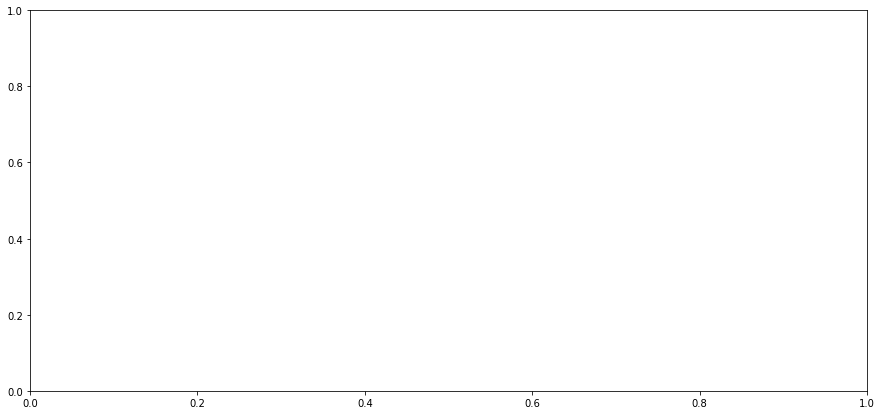

In [43]:
df = Irrigation_2017_NA_0.copy();

fig, ax = plt.subplots(figsize=(15,7))

df.set_index('Date', inplace=True);
df.groupby('Field')['irr_cum_sum'].plot(legend=True);

# add planting dots
plt.scatter(x = planting_table['planting dates'], 
            y = planting_table['y'], 
            linewidths=3, 
            c = planting_table.colors)

plt.scatter(x = harvesting_table['harvesting dates'], 
            y = harvesting_table['y'], 
            linewidths=3,
            c = harvesting_table.colors)

ax.grid(True);
ax.set_title("Cumulative irrigation (dots are planting and harvesting dates)");

# file_name = python_data_dir + "Cumulative_irrigation_wPantingHarvesting_2.png"
# plt.savefig(fname = file_name, dpi=600, bbox_inches='tight')
# plt.show()